INFO       Cache size for target "cython": 1062 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/russell/.cython/brian_extensions" directory. [brian2]


<spikemonitor.count: array([1], dtype=int32)>


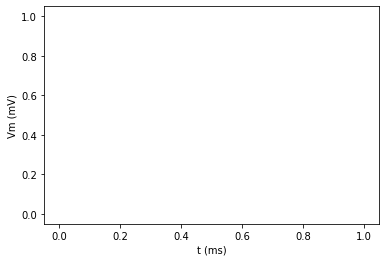

In [1]:
import matplotlib.pyplot as plt
from brian2 import *
import brian2 as b2
num_neurons = 1
duration = 2*second

# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
I : amp
''')
# Threshold and refractoriness are only used for spike counting
neuron = NeuronGroup(1, eqs,
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
neuron.v = El
neuron.I = '100*uA'# * i'# / num_neurons'

monitor = SpikeMonitor(neuron)
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
state_dic = state_monitor.get_states()
run(duration)
print(monitor.count)

from neo import AnalogSignal
import quantities as pq
vm = state_dic['v']
vm = [ float(i) for i in vm ]

vm = AnalogSignal(vm,units = pq.mV,sampling_period = float(1.0) * pq.ms)
plot(vm.magnitude,vm.times)

xlabel('t (ms)')
ylabel('Vm (mV)')
show()

<spikemonitor_1.count: array([45], dtype=int32)>


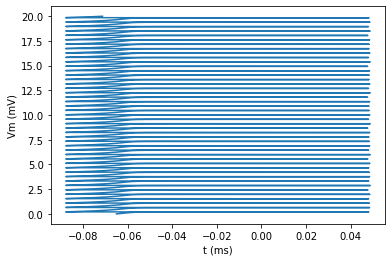

dict_keys(['t', 'N', 'v'])
[[-65.        ]
 [-64.95010779]
 [-64.899995  ]
 ...
 [-71.41791769]
 [-71.3360177 ]
 [-71.25452533]] mV


In [9]:
neuron.v = El
neuron.I = '0.0001*uA'# * i'# / num_neurons'

monitor = SpikeMonitor(neuron)
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
run(duration)
print(monitor.count)
state_dic = state_monitor.get_states()

from neo import AnalogSignal
import quantities as pq
vm = state_dic['v']
vm = [ float(i) for i in vm ]
#print(vm)

vm = AnalogSignal(vm,units = pq.mV,sampling_period = float(1.0) * pq.ms)
plt.plot(vm.magnitude,vm.times)

plt.xlabel('t (ms)')
plt.ylabel('Vm (mV)')
plt.show()
print(state_dic.keys())
print(state_dic['v'])

Starting simulation at t=4. s for a duration of 50. ms
50. ms (100%) simulated in < 1s
Starting simulation at t=4.053 s for a duration of 100. ms
100. ms (100%) simulated in < 1s


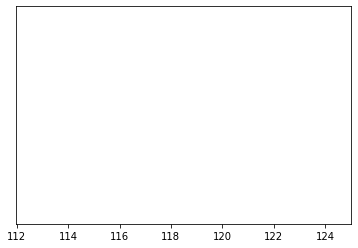

In [3]:
M = StateMonitor(neuron, 'v', record=True)

run(50*ms, report='text')
neuron.I[0] = 2*uA  # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(100*ms, report='text')
#for i in range(75, 125, 1):
#    plot(cumsum(neuron.length)/cm, i+(1./60)*M.v[:, i*5]/mV, 'k')
plot(monitor.count / duration,neuron.v)

yticks([])
#ylabel('Time [major] v (mV) [minor]')
#xlabel('Position (cm)')
axis('tight')
show()